In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [45]:
df = pd.read_csv('amazon.csv')
df

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19991,this app is fricken stupid.it froze on the kin...,0
19992,Please add me!!!!! I need neighbors! Ginger101...,1
19993,love it! this game. is awesome. wish it had m...,1
19994,I love love love this app on my side of fashio...,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [47]:
df.describe()

,label
count,19996.000000
mean,0.761652
std,0.426083
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df['label'].value_counts()

,count
label,
1,15230
0,4766


In [50]:
df['label'].unique()


array([1, 0])

In [51]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [53]:
from nltk.stem import PorterStemmer
import string
ps = PorterStemmer()
corpus=[]

In [54]:
for i in range(len(df)):
  text = df['Text'].iloc[i].lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = text.split()
  text = [ps.stem(word) for word in text if word not in stop_words]
  text = ' '.join(text)
  corpus.append(text)


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_counts = cv.fit_transform(corpus)

In [56]:
print("number of words in bag words: "),
len(cv.get_feature_names_out())

number of words in bag words: 


18615

In [57]:
x = X_counts
y = df['label']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [60]:
y_pred=model.predict(x_test)

In [62]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report: \n", classification_report(y_test,y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test,y_pred))

Accuracy:  0.872

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.69      0.72       978
           1       0.90      0.93      0.92      3022

    accuracy                           0.87      4000
   macro avg       0.83      0.81      0.82      4000
weighted avg       0.87      0.87      0.87      4000


Confusion Matrix: 
 [[ 671  307]
 [ 205 2817]]


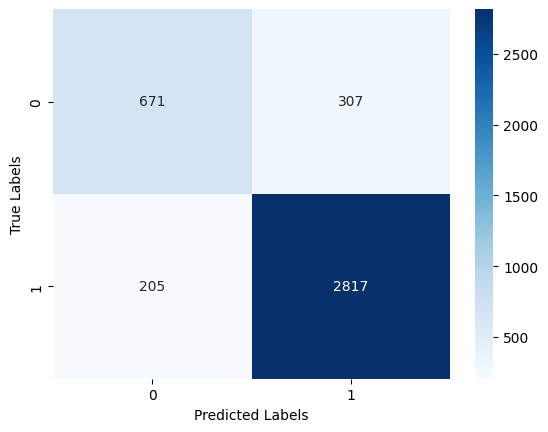

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.heatmap(
    confusion_matrix(y_test,y_pred),
    annot=True,fmt='d',cmap='Blues',
    xticklabels=['0','1'],
    yticklabels=['0','1']
   )


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [68]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.7, random_state=42)
x_rus, y_rus = rus.fit_resample(x, y)

print("Before Undersampling:", pd.Series(y).value_counts())
print("After Undersampling:", pd.Series(y_rus).value_counts())

Before Undersampling: label
1    15230
0     4766
Name: count, dtype: int64
After Undersampling: label
1    6808
0    4766
Name: count, dtype: int64


In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


model = MultinomialNB()
model.fit(x_rus, y_rus)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

cn = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Confusion Matrix: \n", cn)


Accuracy:  0.907
Precision:  0.9594313453536755
Recall:  0.9156187954996691
F1 Score:  0.9370132069082289
Confusion Matrix: 
 [[ 861  117]
 [ 255 2767]]
